In [18]:
import pandas as pd
audio_features = pd.read_csv('SpotGenTrack/Features Extracted/low_level_audio_features.csv', index_col = 0)

In [19]:
print(audio_features)

        Chroma_1  Chroma_10  Chroma_11  Chroma_12  Chroma_2  Chroma_3  \
0       0.438296   0.472769   0.427441   0.436688  0.467697  0.493862   
1       0.596605   0.368288   0.285263   0.302211  0.905805  0.510909   
2       0.505224   0.500420   0.506773   0.488258  0.498356  0.573582   
3       0.525690   0.666469   0.579492   0.498920  0.598528  0.631578   
4       0.632214   0.503698   0.496942   0.611532  0.634613  0.697265   
...          ...        ...        ...        ...       ...       ...   
101904  0.490023   0.515784   0.486486   0.423909  0.560561  0.611700   
101905  0.363989   0.549431   0.540238   0.379981  0.365865  0.295325   
101906  0.563928   0.537108   0.501177   0.484612  0.527684  0.526852   
101907  0.557407   0.628247   0.609026   0.545492  0.446852  0.397354   
101908  0.508732   0.503045   0.535364   0.488872  0.500202  0.606657   

        Chroma_4  Chroma_5  Chroma_6  Chroma_7  ...  Tonnetz_4  Tonnetz_5  \
0       0.512244  0.568658  0.560524  0.513068

In [20]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
#Separate numeric and string columns (track_id) as PCA can only be performed on numeric columns
numeric_columns = audio_features.select_dtypes(include=['number']).columns
non_numeric_columns = audio_features.select_dtypes(exclude=['number']).columns

numeric_data = audio_features[numeric_columns]
non_numeric_data = audio_features[non_numeric_columns]

In [23]:
#Standardize numeric data
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

In [10]:
#Here choose number of columns to which data should be reduced and perform PCA
n_components = 10
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_numeric_data)

In [11]:
#Create new dataframe with principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

In [17]:
#Concatenate non-numeric data again with the new dataframe
processed_data = pd.concat([non_numeric_data.reset_index(drop=True), principal_df], axis=1)

In [13]:
print(processed_data)

                      track_id        PC1       PC2       PC3       PC4  \
0       19YEk4OVQZn3GfoxbpNrU6  -9.373173  1.207779  2.579305  5.509296   
1       6zJms3MX11Qu1IKF44LoRW  -4.340399 -4.404526  6.123831 -0.176494   
2       1WugzepXsLjnsM0K4UaWYc   2.786318  0.128274 -0.785933 -2.562182   
3       1pSlTbCrUJ9rmwj5CNNrX4  14.035909 -8.195006 -0.928506  6.569275   
4       5yruvWJs3mL00w4slpCVzN   5.757036 -3.013227  1.666218  2.456897   
...                        ...        ...       ...       ...       ...   
101904  64iZLIYuqRR8rNedN0Yvnh   7.218389  0.844754 -5.011435  1.988886   
101905  0qo0ibv3YoVwJ3jKjpB8lQ  -3.587573  0.517763 -1.047109 -1.839261   
101906  1B7tV3WzEnDUS7wXSKDXk3  12.685639 -2.726685 -0.759648  0.255591   
101907  7DVr6Az7HukAZeK7v3cGZx  12.616335 -4.502690 -3.434059  6.583819   
101908  6Tgjsd4bD8eb74HOTCr6LC  -3.007530  2.915291 -2.026887 -0.163065   

             PC5       PC6       PC7       PC8       PC9      PC10  
0      -3.643718  0.024255 -0.

In [14]:
pca_full = PCA()
principal_components_full = pca_full.fit_transform(scaled_numeric_data)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

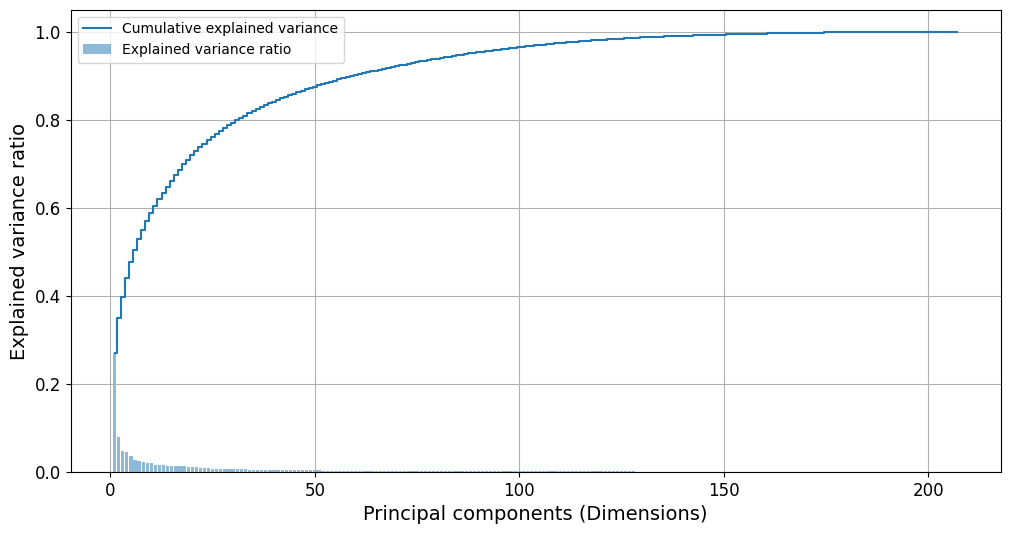

In [15]:
#Check for ideal dimensionality reduction, preferable to choose the number of dimensions that add up to a sufficiently 
#large portion of the variance (e.g., 95%)

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(12, 6))
plt.bar(x, explained_variance_ratio, alpha=0.5, align='center', label='Explained variance ratio')
plt.step(x, cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components (Dimensions)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [16]:
#Redo PCA with number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_numeric_data)
n_components = principal_components.shape[1]
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])
processed_data = pd.concat([non_numeric_data.reset_index(drop=True), principal_df], axis=1)
print(processed_data)

                      track_id        PC1       PC2       PC3       PC4  \
0       19YEk4OVQZn3GfoxbpNrU6  -9.373173  1.207779  2.579315  5.509278   
1       6zJms3MX11Qu1IKF44LoRW  -4.340399 -4.404526  6.123797 -0.176404   
2       1WugzepXsLjnsM0K4UaWYc   2.786318  0.128274 -0.785948 -2.562150   
3       1pSlTbCrUJ9rmwj5CNNrX4  14.035909 -8.195006 -0.928468  6.569178   
4       5yruvWJs3mL00w4slpCVzN   5.757036 -3.013227  1.666180  2.457010   
...                        ...        ...       ...       ...       ...   
101904  64iZLIYuqRR8rNedN0Yvnh   7.218389  0.844754 -5.011449  1.988921   
101905  0qo0ibv3YoVwJ3jKjpB8lQ  -3.587573  0.517763 -1.047101 -1.839291   
101906  1B7tV3WzEnDUS7wXSKDXk3  12.685639 -2.726685 -0.759665  0.255639   
101907  7DVr6Az7HukAZeK7v3cGZx  12.616335 -4.502690 -3.434090  6.583917   
101908  6Tgjsd4bD8eb74HOTCr6LC  -3.007530  2.915291 -2.026890 -0.163060   

             PC5       PC6       PC7       PC8       PC9  ...      PC79  \
0      -3.643796  0.0243